# Import data dan ketahui jenis-jenis data setiap kolom

In [166]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://dqlab.id/data/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)

print("Informasi data frame awal:")
df_covid_worldwide.info()

df_covid_worldwide = df_covid_worldwide.set_index("date").sort_values(by="date")

print("\nInformasi data frame setelah set index kolom date:")
df_covid_worldwide

Informasi data frame awal:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61900 entries, 0 to 61899
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   61900 non-null  datetime64[ns]
 1   daily_confirmed_cases  61900 non-null  int64         
 2   daily_deaths           61900 non-null  int64         
 3   confirmed_cases        61900 non-null  int64         
 4   deaths                 61900 non-null  int64         
 5   geo_id                 61625 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.3+ MB

Informasi data frame setelah set index kolom date:


,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id
date,,,,,
2019-12-31,0,0,0,0,IN
2019-12-31,0,0,0,0,IR
2019-12-31,0,0,0,0,PK
2019-12-31,0,0,0,0,AM
2019-12-31,27,0,27,0,CN
...,...,...,...,...,...
2020-12-14,528,1,9708,92,UY
2020-12-14,26,0,69,0,GD
2020-12-14,0,0,11101,166,MT


# Missing Value

In [167]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://dqlab.id/data/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index()

print("Jumlah missing value tiap kolom:")
print(df_covid_worldwide.isnull().sum())

df_covid_worldwide = df_covid_worldwide.dropna(inplace=True)

print("\nJumlah missing value tiap kolom setelah didrop:")
print(df_covid_worldwide.isnull().sum())

Jumlah missing value tiap kolom:
daily_confirmed_cases      0
daily_deaths               0
confirmed_cases            0
deaths                     0
geo_id                   275
dtype: int64

Jumlah missing value tiap kolom setelah didrop:


AttributeError: 'NoneType' object has no attribute 'isnull'

# Merge Dataset

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://dqlab.id/data/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index().dropna()

countries_url = "https://dqlab.id/data/country_details.json"
df_countries = pd.read_json(countries_url)

df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")
print(df_covid_denormalized)

# Menghitung Fatality Ratio

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://dqlab.id/data/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index().dropna()

countries_url = "https://dqlab.id/data/country_details.json"
df_countries = pd.read_json(countries_url)

df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")

df_covid_denormalized["fatality_ratio"] = df_covid_denormalized["deaths"] / df_covid_denormalized["confirmed_cases"]
print(df_covid_denormalized.head())

# Melihat 20 negara tertinggi

In [168]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://dqlab.id/data/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index().dropna()

countries_url = "https://dqlab.id/data/country_details.json"
df_countries = pd.read_json(countries_url)

df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")

df_covid_denormalized["fatality_ratio"] = df_covid_denormalized["deaths"] / df_covid_denormalized["confirmed_cases"]

df_top_20_fatality_rate = df_covid_denormalized.sort_values(by="fatality_ratio", ascending=False)#.___(___)
print(df_top_20_fatality_rate[["geo_id","country_name","fatality_ratio"]].head(20))
# print(df_top_20_fatality_rate[["geo_id","country_name","fatality_ratio"]])

           geo_id country_name  fatality_ratio
date                                          
2020-03-15     SD        Sudan             1.0
2020-02-20     IR         Iran             1.0
2020-03-16     GT    Guatemala             1.0
2020-03-13     GY       Guyana             1.0
2020-03-18     SD        Sudan             1.0
2020-03-17     SD        Sudan             1.0
2020-03-16     SD        Sudan             1.0
2020-02-03     PH  Philippines             0.5
2020-02-05     PH  Philippines             0.5
2020-02-04     PH  Philippines             0.5
2020-03-28     NI    Nicaragua             0.5
2020-02-02     PH  Philippines             0.5
2020-03-24     ZW     Zimbabwe             0.5
2020-03-24     GM       Gambia             0.5
2020-03-19     SD        Sudan             0.5
2020-03-20     SD        Sudan             0.5
2020-03-21     SD        Sudan             0.5
2020-03-22     SD        Sudan             0.5
2020-03-23     SD        Sudan             0.5
2020-03-24   

# Menampilkan data 20 teratas pada bulan agustus

In [35]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://dqlab.id/data/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index().dropna()

countries_url = "https://dqlab.id/data/country_details.json"
df_countries = pd.read_json(countries_url)

df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")

df_covid_denormalized["fatality_ratio"] = df_covid_denormalized["deaths"] / df_covid_denormalized["confirmed_cases"]

print(df_covid_denormalized[["geo_id","country_name","fatality_ratio"]].loc["2020-08"].groupby("country_name").sum().sort_values(
    by=["fatality_ratio"], ascending=False).head(20))#.drop_duplicates(subset=["country_name"]


                        fatality_ratio
country_name                          
Yemen                         8.879883
France                        4.335139
Italy                         4.299190
United_Kingdom                4.040225
Belgium                       3.890099
Hungary                       3.823878
Netherlands                   3.096865
Mexico                        3.069635
Jersey                        2.750839
British_Virgin_Islands        2.673802
Spain                         2.517502
Chad                          2.446168
Montserrat                    2.384615
Canada                        2.294347
Sweden                        2.217322
Isle_of_Man                   2.214286
Sint_Maarten                  2.103930
Ireland                       2.017663
Sudan                         1.992533
Liberia                       1.982393


# Visualisasi Data

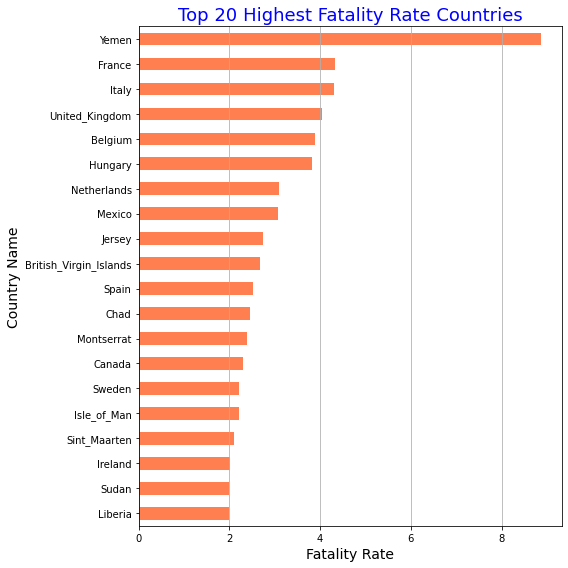

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://dqlab.id/data/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index().dropna()

countries_url = "https://dqlab.id/data/country_details.json"
df_countries = pd.read_json(countries_url)

df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")

df_covid_denormalized["fatality_ratio"] = df_covid_denormalized["deaths"] / df_covid_denormalized["confirmed_cases"]

df_20_top_country = df_covid_denormalized.loc["2020-08"].groupby("country_name")["fatality_ratio"].sum()
df_20_top_country = df_20_top_country.sort_values(ascending=False).head(20)
df_20_top_country
plt.figure(figsize=(8,8))
df_20_top_country.sort_values().plot(kind="barh", color="coral")
plt.title("Top 20 Highest Fatality Rate Countries", fontsize=18, color="b")
plt.xlabel("Fatality Rate", fontsize=14)
plt.ylabel("Country Name", fontsize=14)
plt.grid(axis="x")
plt.tight_layout()
plt.show()

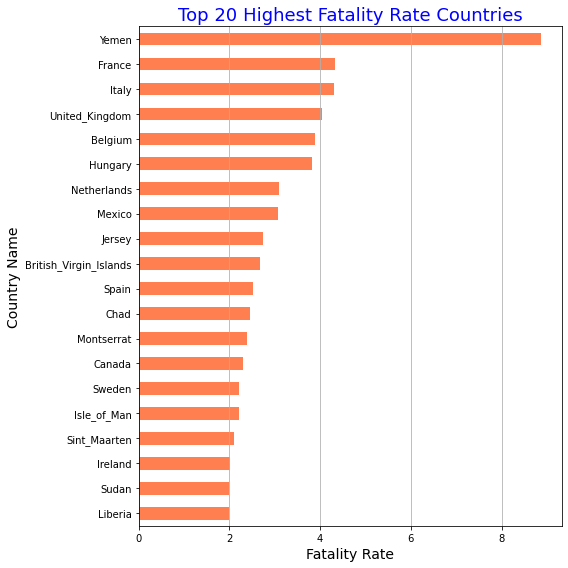

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://dqlab.id/data/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index().dropna()

countries_url = "https://dqlab.id/data/country_details.json"
df_countries = pd.read_json(countries_url)

df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")

df_covid_denormalized["fatality_ratio"] = df_covid_denormalized["deaths"] / df_covid_denormalized["confirmed_cases"]

df_20_top_country = df_covid_denormalized.loc["2020-08"].groupby("country_name").sum()

df_20_top_country = df_20_top_country.sort_values("fatality_ratio", ascending=False).head(20)

plt.figure(figsize=(8,8))
df_20_top_country["fatality_ratio"].sort_values().plot(kind="barh", color="coral")
plt.title("Top 20 Highest Fatality Rate Countries", fontsize=18, color="b")
plt.xlabel("Fatality Rate", fontsize=14)
plt.ylabel("Country Name", fontsize=14)
plt.grid(axis="x")
plt.tight_layout()
plt.show()


# Tampilkan semua yang hanya berhubungan dengan :
### 'Vietnam' 'Indonesia' 'Thailand' 'Singapore' 'Malaysia'

In [108]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://dqlab.id/data/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index().dropna()

countries_url = "https://dqlab.id/data/country_details.json"
df_countries = pd.read_json(countries_url)

df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")
asean_country_id = ["ID", "MY", "SG", "TH", "VN"]
filter_list = [(df_covid_denormalized["geo_id"]==country_id).to_numpy() for country_id in asean_country_id]
filter_array = np.column_stack(filter_list).sum(axis=1, dtype="bool")
df_covid_denormalized_asean = df_covid_denormalized[filter_array].sort_index()
print("Cek nilai unik di kolom 'country_name':", df_covid_denormalized_asean["country_name"].unique())
print(df_covid_denormalized_asean.head())


Cek nilai unik di kolom 'country_name': ['Malaysia' 'Vietnam' 'Thailand' 'Singapore' 'Indonesia']
            daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
date                                                                       
2019-12-31                      0             0                0       0   
2019-12-31                      0             0                0       0   
2019-12-31                      0             0                0       0   
2019-12-31                      0             0                0       0   
2019-12-31                      0             0                0       0   

           geo_id country_name  
date                            
2019-12-31     MY     Malaysia  
2019-12-31     VN      Vietnam  
2019-12-31     TH     Thailand  
2019-12-31     SG    Singapore  
2019-12-31     ID    Indonesia  


# Mengetahui kapan dari masing-masing negara tersebut muncul kasus pertama

In [134]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://dqlab.id/data/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index().dropna()

countries_url = "https://dqlab.id/data/country_details.json"
df_countries = pd.read_json(countries_url)

df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")
asean_country_id = ["ID", "MY", "SG", "TH", "VN"]
filter_list = [(df_covid_denormalized["geo_id"]==country_id).to_numpy() for country_id in asean_country_id]
filter_array = np.column_stack(filter_list).sum(axis=1, dtype="bool")
df_covid_denormalized_asean = df_covid_denormalized[filter_array].sort_index()
# print("Cek nilai unik di kolom 'country_name':", df_covid_denormalized_asean["country_name"].unique())

for country_id in asean_country_id:
    asean_country = df_covid_denormalized_asean[df_covid_denormalized_asean["geo_id"]==country_id]
    first_case = asean_country[asean_country["confirmed_cases"] > 0][["confirmed_cases","geo_id","country_name"]]
    print(first_case.head(1))

print(df_covid_denormalized_asean)

            confirmed_cases geo_id country_name
date                                           
2020-03-02                2     ID    Indonesia
            confirmed_cases geo_id country_name
date                                           
2020-01-25                3     MY     Malaysia
            confirmed_cases geo_id country_name
date                                           
2020-01-24                3     SG    Singapore
            confirmed_cases geo_id country_name
date                                           
2020-01-13                1     TH     Thailand
            confirmed_cases geo_id country_name
date                                           
2020-01-24                2     VN      Vietnam
            daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
date                                                                       
2019-12-31                      0             0                0       0   
2019-12-31                      0             0     

# Data dari 1 maret sampai tanggal terakhir

In [139]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://dqlab.id/data/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index().dropna()

countries_url = "https://dqlab.id/data/country_details.json"
df_countries = pd.read_json(countries_url)

df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")

asean_country_id = ["ID", "MY", "SG", "TH", "VN"]
filter_list = [(df_covid_denormalized["geo_id"]==country_id).to_numpy() for country_id in asean_country_id]
filter_array = np.column_stack(filter_list).sum(axis=1, dtype="bool")
df_covid_denormalized_asean = df_covid_denormalized[filter_array].sort_index()

df_covid_denormalized_asean_march_onward = df_covid_denormalized_asean[df_covid_denormalized_asean.index>="2020-03-01"]
print(df_covid_denormalized_asean_march_onward.head())

            daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
date                                                                       
2020-03-01                      0             1               42       1   
2020-03-01                      4             0              102       0   
2020-03-01                      0             0               16       0   
2020-03-01                      0             0                0       0   
2020-03-01                      0             0               25       0   

           geo_id country_name  
date                            
2020-03-01     TH     Thailand  
2020-03-01     SG    Singapore  
2020-03-01     VN      Vietnam  
2020-03-01     ID    Indonesia  
2020-03-01     MY     Malaysia  


# Visualisasi Data

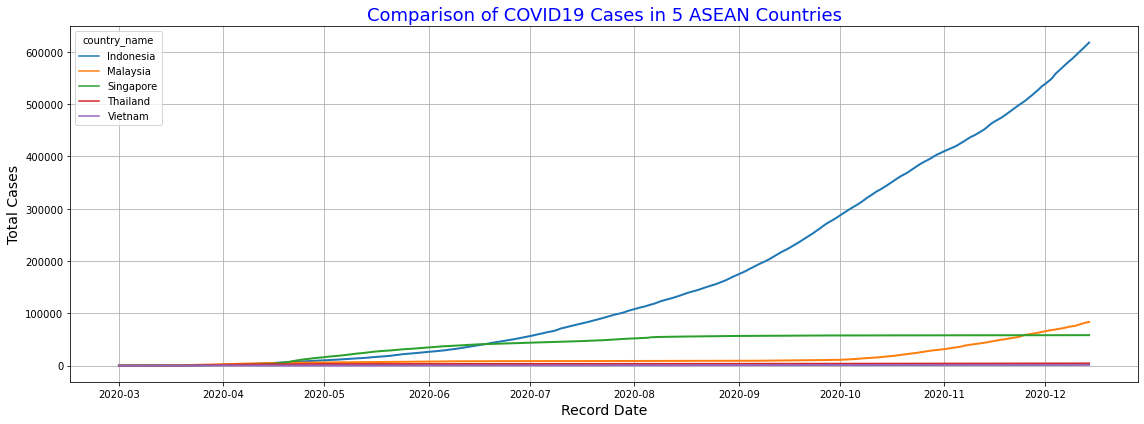

In [163]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://dqlab.id/data/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index().dropna()

countries_url = "https://dqlab.id/data/country_details.json"
df_countries = pd.read_json(countries_url)

df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")

asean_country_id = ["ID", "MY", "SG", "TH", "VN"]
filter_list = [(df_covid_denormalized["geo_id"]==country_id).to_numpy() for country_id in asean_country_id]
filter_array = np.column_stack(filter_list).sum(axis=1, dtype="bool")
df_covid_denormalized_asean = df_covid_denormalized[filter_array].sort_index()
df_covid_denormalized_asean = df_covid_denormalized_asean.reset_index().sort_values(["date"])
df_covid_denormalized_asean_march_onward = df_covid_denormalized_asean[df_covid_denormalized_asean["date"]>="2020-03-01"].sort_values("confirmed_cases", ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,6))
sns.lineplot(x="date", 
             y="confirmed_cases", 
             hue="country_name",
             data=df_covid_denormalized_asean_march_onward,
             linewidth=2)
plt.xlabel('Record Date', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.title('Comparison of COVID19 Cases in 5 ASEAN Countries', color="b", fontsize=18)
plt.grid()
plt.tight_layout()
plt.show()